<a href="https://colab.research.google.com/github/abood-W/ai_python/blob/main/car_pred_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer

In [69]:
df = pd.read_csv('/content/imports-85.data', header=None)

In [70]:
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]
df.columns = column_names

#cleaning process
df.drop_duplicates()
df = df.drop(['peak_rpm' ,'peak_rpm','engine_location','symboling','num_doors','fuel_system','compression_ratio','aspiration','engine_type','height'] , axis=1)
print(df.columns)
print(df)

Index(['normalized_losses', 'make', 'fuel_type', 'body_style', 'drive_wheels',
       'wheel_base', 'length', 'width', 'curb_weight', 'num_cylinders',
       'engine_size', 'bore', 'stroke', 'horsepower', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')
    normalized_losses         make fuel_type   body_style drive_wheels  \
0                   ?  alfa-romero       gas  convertible          rwd   
1                   ?  alfa-romero       gas  convertible          rwd   
2                   ?  alfa-romero       gas    hatchback          rwd   
3                 164         audi       gas        sedan          fwd   
4                 164         audi       gas        sedan          4wd   
..                ...          ...       ...          ...          ...   
200                95        volvo       gas        sedan          rwd   
201                95        volvo       gas        sedan          rwd   
202                95        volvo       gas        sedan      

In [71]:
df.replace("?", np.nan, inplace=True)
num_cols = ["normalized_losses", "bore", "stroke", "horsepower", "price"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df


,normalized_losses,make,fuel_type,body_style,drive_wheels,wheel_base,length,width,curb_weight,num_cylinders,engine_size,bore,stroke,horsepower,city_mpg,highway_mpg,price
0,122.0,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,2548,four,130,3.47,2.68,111.0,21,27,13495.0
1,122.0,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,2548,four,130,3.47,2.68,111.0,21,27,16500.0
2,122.0,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,2823,six,152,2.68,3.47,154.0,19,26,16500.0
3,164.0,audi,gas,sedan,fwd,99.8,176.6,66.2,2337,four,109,3.19,3.40,102.0,24,30,13950.0
4,164.0,audi,gas,sedan,4wd,99.4,176.6,66.4,2824,five,136,3.19,3.40,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,sedan,rwd,109.1,188.8,68.9,2952,four,141,3.78,3.15,114.0,23,28,16845.0
201,95.0,volvo,gas,sedan,rwd,109.1,188.8,68.8,3049,four,141,3.78,3.15,160.0,19,25,19045.0
202,95.0,volvo,gas,sedan,rwd,109.1,188.8,68.9,3012,six,173,3.58,2.87,134.0,18,23,21485.0
203,95.0,volvo,diesel,sedan,rwd,109.1,188.8,68.9,3217,six,145,3.01,3.40,106.0,26,27,22470.0


In [72]:
  import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['make'], y=df['price'])
plt.title("make vs Price")
plt.xlabel("make")
plt.ylabel("Price")
plt.grid(True)
plt.show()
"""

'\nplt.figure(figsize=(8,6))\nsns.scatterplot(x=df[\'make\'], y=df[\'price\'])\nplt.title("make vs Price")\nplt.xlabel("make")\nplt.ylabel("Price")\nplt.grid(True)\nplt.show()\n'

In [73]:
df_encoded = pd.get_dummies(df, drop_first=True) #  احول القيم النصية الى رقمية
X = df_encoded.drop("price", axis=1).values
y = df_encoded[["price"]].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
df.shape

(205, 17)

In [77]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
"""
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)




In [78]:
# model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
# model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): ",r2*100)

R-squared (R2):  92.36213379183175


In [81]:
"""
import numpy as np

rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
"""

'\nimport numpy as np\n\nrmse = np.sqrt(loss)\nprint(f"Root Mean Squared Error (RMSE): {rmse:.2f}")\n'

In [82]:
"""
print("avg price", df["price"].mean())
print("Loss percentage: ",(rmse/df["price"].mean())*100)
"""

'\nprint("avg price", df["price"].mean())\nprint("Loss percentage: ",(rmse/df["price"].mean())*100)\n'

In [83]:
prediction = model.predict(X_test)
print(prediction[:5])

[34255.8   17209.732  8940.193 12871.791 31683.965]


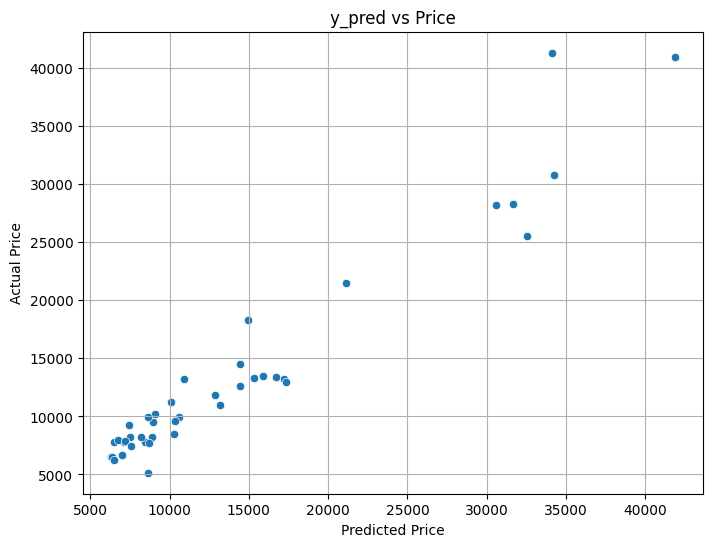

In [84]:
y_pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plot_df = pd.DataFrame({'y_pred': y_pred.flatten(), 'price': y_test.flatten()})
sns.scatterplot(x=plot_df['y_pred'], y=plot_df['price'])
plt.title("y_pred vs Price")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.grid(True)
plt.show()